In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,random_split
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

#Loading Data

In [107]:
# Define the transformation for the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
full_train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Calculate the sizes for the training and validation sets
total_size = len(full_train_dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size

# Use random_split to create training and validation datasets
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Create data loaders for training, validation, and testing
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Buliding Model

In [123]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,dropOut,dropRate):
        super(Model, self).__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.ModuleList()  # Using ModuleList for dynamic module registration
        self.hidden_size = hidden_size

        # Add the first linear layer
        self.fc.append(nn.Linear(input_size, hidden_size[0]))

        # Add the middle linear layers with ReLU activation
        for i in range(1, len(hidden_size)):
            self.fc.append(nn.Linear(hidden_size[i - 1], hidden_size[i]))
            self.fc.append(nn.ReLU())
            self.fc.append(nn.Dropout(dropRate))  if dropOut==True else None# Add dropout after each ReLU

        # Add the final linear layer (output layer)
        self.fc.append(nn.Linear(hidden_size[-1], output_size))

    def forward(self, x):
        x = self.flatten(x)

        # Apply all linear layers (including ReLU activations for hidden layers)
        for layer in self.fc:
            x = layer(x)

        return x

In [109]:
# Function to train the model
def train(model,criterion, optimizer,epochs):
  train_losses=[]
  train_accuracies=[]
  val_accuracies=[]
  val_losses=[]
  for epoch in range(epochs):
      model.train()
      total_loss = 0.0
      correct_predictions = 0
      total_samples = 0

      for images, targets in tqdm(train_loader):
          images = images.to(torch.float32)
          targets = targets.to(torch.long)
          optimizer.zero_grad()  # Zero the gradients
          output = model(images)  # Forward pass
          loss = criterion(output, targets)  # Compute the loss
          loss.backward()  # Backward pass
          optimizer.step()  # Update weights
          total_loss += loss.item()
          _, predicted = torch.max(output, 1)
          correct_predictions += (predicted == targets).sum().item()
          total_samples += targets.size(0)

      # Calculate accuracy/loss
      train_losses.append(total_loss / len(train_loader))
      accuracy = correct_predictions / total_samples
      print(f"Train Accuracy:{accuracy * 100:.2f}%")
      train_accuracies.append(accuracy)
      validate(model, criterion,val_losses,val_accuracies)
  return train_losses, val_losses, train_accuracies, val_accuracies
# Function to validate the model
def validate(model, criterion,val_losses,val_accuracies):
        model.eval()

        running_loss_val = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(torch.float32)
                labels = labels.to(torch.long)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss_val += loss.item()
                _, predicted_val = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted_val == labels).sum().item()
        val_loss = running_loss_val / len(val_loader)
        val_accuracy = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        print(f"Validation Accuracy:{val_accuracy * 100:.2f}%")



# Function to test the model
def test(model, criterion):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy:{accuracy * 100:.2f}%")



In [110]:
# Plotting Function
def plot(train_losses, val_losses, train_accuracies, val_accuracies,epochs):
  epochs_range = range(1, epochs + 1)
  # Plotting Loss
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, train_losses, label='Training Loss')
  plt.plot(epochs_range, val_losses, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('Training and Validation Loss')

  # Plotting Accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
  plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Training and Validation Accuracy')

  plt.tight_layout()
  plt.show()

## Training

  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:33.98%
Validation Accuracy:63.08%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:76.48%
Validation Accuracy:84.92%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:86.59%
Validation Accuracy:88.37%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:88.81%
Validation Accuracy:89.11%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:90.08%
Validation Accuracy:89.85%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:90.70%
Validation Accuracy:90.18%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:91.41%
Validation Accuracy:91.01%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:91.97%
Validation Accuracy:91.83%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:92.43%
Validation Accuracy:92.25%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:92.74%
Validation Accuracy:93.06%


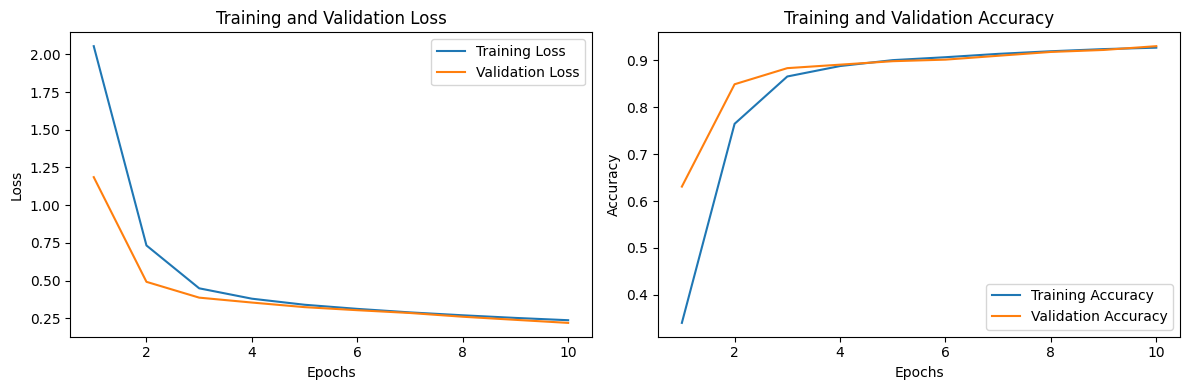

In [125]:
input_size = 28 * 28
hidden_size = [128,128,128,64]
output_size = 10
learning_rate = 0.01
epochs=10
# Instantiate the model, loss function, and optimizer
model = Model(input_size, hidden_size, output_size,False,None)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_losses, val_losses, train_accuracies, val_accuracies = train(model, criterion, optimizer,epochs)
plot(train_losses, val_losses, train_accuracies, val_accuracies,epochs)

# **Add Dropout layer to the model and observing effect**

  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:25.14%
Validation Accuracy:55.41%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:65.27%
Validation Accuracy:83.32%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:80.55%
Validation Accuracy:86.83%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:84.89%
Validation Accuracy:88.76%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:87.08%
Validation Accuracy:89.90%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:88.25%
Validation Accuracy:90.59%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:89.38%
Validation Accuracy:91.37%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:90.01%
Validation Accuracy:91.90%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:90.59%
Validation Accuracy:92.56%


  0%|          | 0/750 [00:00<?, ?it/s]

Train Accuracy:91.20%
Validation Accuracy:92.95%


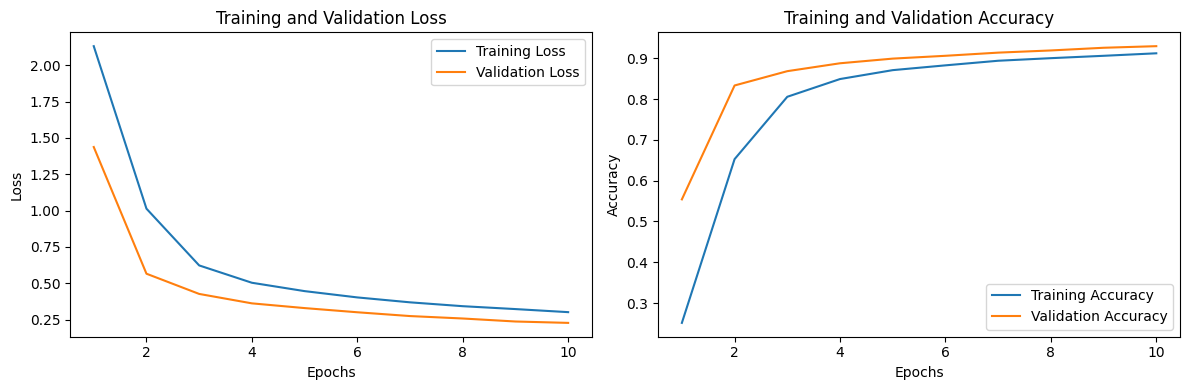

In [124]:
dropRate=0.2
# Instantiate model again but with dropRate
model = Model(input_size, hidden_size, output_size,True,dropRate)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
train_losses, val_losses, train_accuracies, val_accuracies = train(model, criterion, optimizer,epochs)
plot(train_losses, val_losses, train_accuracies, val_accuracies,epochs)

**Observation: Accuracy decreases as this prevents the model from relying too much on specific features, which helps in improving generalization and reducing overfitting**